<div style="position:relative;">
<img src=images/scipy_med.png style="width: 60px; float: left" />
</div>
<div style="position:relative;">
<img src=images/scipy_med.png style="width: 60px; float: right" />
</div>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; SciPy Library

The **SciPy Library** (not to be confused with the whole SciPy Project, which includes the other mentioned packages) offers additional functionality on top of **NumPy** (list is not complete)

- `scipy.stats` Statistical functions (e.g. distributions)
- `scipy.optimize` optimization algorithms for curve fitting, minimization and root finding
- `scipy.special` special functions like the bessel functions or the incomplete gamma function
- `scipy.integrate` numerical integration techniques
- `scipy.interpolate` multi-dimensional interpolation algorithms
- `scipy.fftpack` Fast Fourier Transformation
- `scipy.signal` Signal processing toolbox (e.g. filters and spectral analysis)
- `scipy.linalg` contains numpy.linalg plus additional more advanced functions


## `scipy.stats`

Offers nearly 100 continuous and discrete distributions, and statistical tests.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

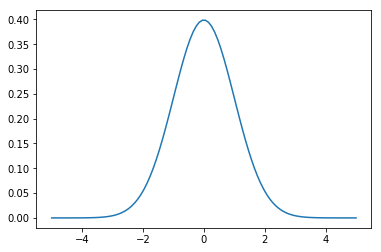

In [6]:
import scipy.stats
x = np.linspace(-5, 5, 100)
standard_normal_pdf = scipy.stats.norm.pdf(x)
plt.plot(x, standard_normal_pdf)

## Shape Parameters

Each distribution has at least two **shape parameters**:
- **loc** defines the position of distribution in some sense
- **scale** defines the width of the distribution in some sense

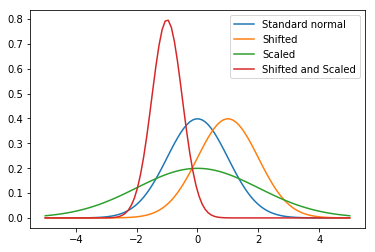

In [7]:
plt.plot(x, scipy.stats.norm.pdf(x), label='Standard normal')
plt.plot(x, scipy.stats.norm.pdf(x, loc=1), label='Shifted')
plt.plot(x, scipy.stats.norm.pdf(x, scale=2.0), label='Scaled')
plt.plot(x, scipy.stats.norm.pdf(x, loc=-1, scale=0.5), label='Shifted and Scaled')
plt.legend()
plt.show()

## Distribution Properties

Each distributions defines several methods (list not complete):
- `pdf` The probability density function
- `cdf` The cumulative density function (integral of pdf)
- `ppf` The percentile function (inverse of cdf)
- `moment` N-th non-central moment
- `rvs` Random numbers drawn from this distribution
- `fit` Parameter estimates for generic data

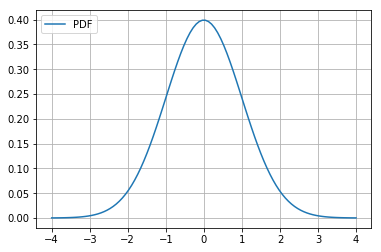

In [19]:
x = np.linspace(-4, 4, 100)
plt.plot(x, scipy.stats.norm.pdf(x), label='PDF')
plt.legend(loc='upper left')
plt.grid(True)

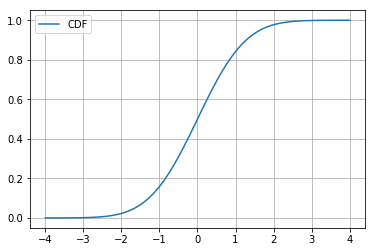

In [20]:
plt.plot(x, scipy.stats.norm.cdf(x), label='CDF')
plt.legend(loc='upper left')
plt.grid(True)

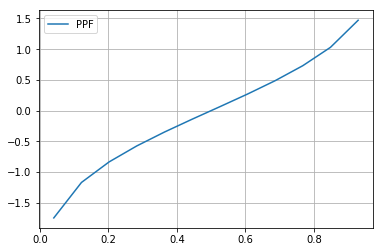

In [21]:
plt.plot(x, scipy.stats.norm.ppf(x), label='PPF')
plt.legend(loc='upper left')
plt.grid(True)

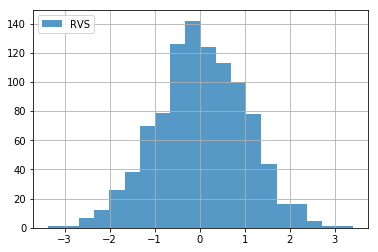

In [22]:
plt.hist(scipy.stats.norm.rvs(size=1000), bins=20, label='RVS', alpha=0.75)
plt.legend(loc='upper left')
plt.grid(True)

## Statistical tests

Here's a more advanced example.

We create 1000 samples, each sample contains 20 randomly drawn numbers.
Now we perform a statisical test, and check if the 20 randomly drawn numbers are compatible with a gaussian distribution.
We do this 1000 times and plot a histogram of the p-values returned by the test.

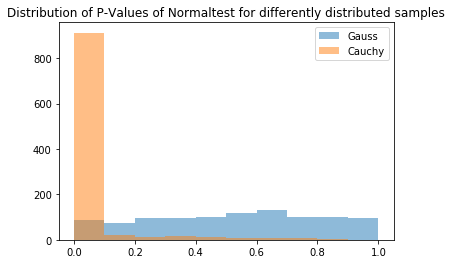

In [28]:
random_gauss_samples = scipy.stats.norm.rvs(size=(20, 1000))
random_cauchy_samples = scipy.stats.cauchy.rvs(size=(20, 1000))
plt.title('Distribution of P-Values of Normaltest for differently distributed samples')
plt.hist(scipy.stats.normaltest(random_gauss_samples, axis=0).pvalue, bins=10, range=(0,1), label='Gauss', alpha=0.5)
plt.hist(scipy.stats.normaltest(random_cauchy_samples, axis=0).pvalue, bins=10, range=(0,1), label='Cauchy', alpha=0.5)
plt.legend()
plt.show()

## `scipy.optimize`

Offers:
- Unconstrained and constrained minimization
- Global /brute-force) optimization routines
- Least-square minimization
- Root finding
- Multivariate equation system solvers

In [29]:
import scipy.optimize

### Example: Solving a transcedental equation

A transcedental equation like  $exp(-x) = -x$, cannot be solved analytically.

One can transform cast an equation into a root finding problem: 
$$exp(-x) - x = 0$$

`scipy.optimize.newton` is one possible algorithms which can calculate the root of a function,
and therefore solve the equation.

In [30]:
def transcedental_equation(x):
    return np.exp(-x) - x

root = scipy.optimize.newton(transcedental_equation, 0.0)
print(root)

0.56714329041


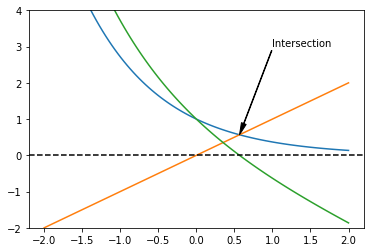

In [31]:
x = np.linspace(-2, 2, 100)
plt.plot(x, np.exp(-x), label='exp(-x)')
plt.plot(x, x, label='x')
plt.plot(x, transcedental_equation(x), label='exp(-x) - x')
plt.axhline(0, color='black', linestyle='--')
plt.ylim((-2, 4))
plt.annotate('Intersection', xy=(root, root), xytext=(1, 3), arrowprops=dict(fc='black', width=0.5, headwidth=5.0))
plt.show()

## `scipy.special`

  * Elliptic functions and integrals
  * Bessel functions
  * Gamma functions
  * Statistical functions
  * Error functions
  * Orthogonal polynomials
  * Hypergeometric functions
  * ...

### Example: Wave Functions of the Quantum Harmonic Oscillator

`scipy.special` contains the hermite polynomials $H_n$ and the gamma functions $\Gamma(n+1) = n!$.

The wave function of the quantum harmonic oscillator is given by:

$$\varphi(x) = \frac{1}{2^n n!}\ \frac{1}{\pi^{1/4}}\ H_n(x)\ \mathrm{e}^{-x^2}$$

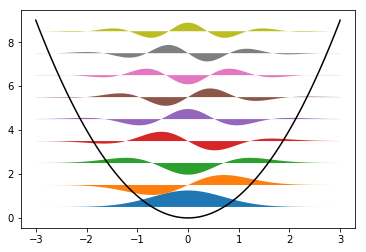

In [64]:
import scipy.special
x = np.linspace(-3, 3, 100)
plt.plot(x, x**2, color='black')
for n in range(9):
    y = (np.pi**-0.25
         * scipy.special.hermite(n)(x) * np.exp(-x**2) 
         / (2**n * scipy.special.gamma(n+1))**0.5 )
    energy = n + 0.5
    plt.fill_between(x, y + energy, energy)

## Exercise

#### Task 1

Calculate the probability that a value drawn from a standard normal distribution is in the interval (-1, 1), (-2, 2) and (-3, 3)


#### Task 2

Plot the radial component of the wave function for the electron in the hydrogen atom for different quantum numbers $n$ and $l$.

$$R_{nl}(r) = \sqrt{\frac{(n-l-1)!}{2n^4(n+l)!}}\ \mathrm{e}^{-\frac{r}{2n}}\ \left(\frac{r}{n}\right)^l\ L^{2l+1}_{n-l-1}\left(\frac{r}{n}\right)$$

$$E_n \sim - \frac{1}{n^2}$$ 


#### Task 3

Visualize the Rosenbrock function in a contour-plot and find its minimum

$$ f(x, y) = (1 - x)^2 + 100\: (y - x^2)^2$$